# Socio economic Factors

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
data=pd.read_csv('../Data/Complete_Data.csv')
data.dropna(inplace=True)
comp_data = data
data.sample(10)

,Unnamed: 0,Sl.No.,State/UT,Women alcohol %,Men alcohol %,Literacy %,Below Poverty Line (BPL) of rural population,Below Poverty Line (BPL) of urban population,Rural homeless population,Urban homeless population,...,Population,Sex Ratio,Area,Net State Domestic Product,Region Pop(in_bill),Greed_adg,Loath_adg,Love_adg,Year,Region
158,158,15,Tamil Nadu,14.800000,49.6,80.5,58.934440,22.836010,13812,37117,...,76255,998.349013,130058,143482.0,1.768,162.895928,579.751131,140.837104,2020.0,S
107,107,36,Puducherry,33.458621,42.2,80.0,0.674211,0.537234,82,1508,...,1490,930.051813,479,155466.0,1.768,1.131222,4.524887,0.000000,2018.0,S
35,35,36,Puducherry,33.458621,42.2,80.0,0.674211,0.537234,82,1508,...,1422,939.972715,479,126531.0,1.768,1.696833,5.656109,1.131222,2016.0,S
87,87,16,Telangana,28.500000,45.5,80.0,23.657500,7.906634,35243,48726,...,37094,1012.478299,112077,146777.0,0.310,567.741935,941.935484,290.322581,2018.0,S
72,72,1,Andhra Pradesh,39.700000,53.1,70.0,38.114920,8.488648,34111,27131,...,52103,1001.267524,162968,108853.0,1.768,102.375566,211.538462,25.452489,2018.0,S
71,71,36,Puducherry,33.458621,42.2,80.0,0.674211,0.537234,82,1508,...,1455,934.840426,479,134934.0,1.768,6.221719,6.221719,1.131222,2017.0,S
7,7,8,Karnataka,13.800000,51.9,77.5,91.912280,36.029590,41262,35473,...,64534,1028.733103,191791,131186.0,1.768,143.099548,156.108597,80.882353,2016.0,S
18,18,19,Arunachal Pradesh,45.200000,55.1,71.5,4.151332,0.645211,1289,345,...,1467,1063.291139,83743,91311.0,0.310,3.225806,9.677419,22.580645,2016.0,NE
53,53,18,West Bengal,40.800000,32.5,78.5,140.036400,42.650340,29073,104967,...,96044,1046.450183,88752,64007.0,1.768,218.325792,131.787330,19.796380,2017.0,E
183,183,4,Chattisgarh,36.800000,35.5,75.0,87.471110,14.694660,17681,6533,...,29693,1006.419353,135191,78377.0,2.154,42.246982,110.492108,54.781801,2021.0,C


In [38]:
data.rename(columns = {'Greed_adg':'Greed',
            'Love_adg' : 'Love',
            'Loath_adg' : 'Loath'},inplace=True)

## Feature Engineering

In [39]:
data['Urbanization'] = comp_data['Urban population'] / comp_data['Population']
data['NSDP per capita'] = comp_data['Net State Domestic Product'] / comp_data['Population']
data['Population Density'] = comp_data['Population']/comp_data['Area']
data['Homeless prop'] = (data['Rural homeless population'] + data['Urban homeless population']) / data['Population']
data['cat'] = data['Sex Ratio'].apply(lambda x: x+1000)
data['Alcohol %'] = ((data['Sex Ratio'] * data['Men alcohol %']) + (1000 * data['Women alcohol %'])) / (data['cat'])
data['Below poverty line'] = data['Below Poverty Line (BPL) of rural population'] + data['Below Poverty Line (BPL) of urban population']
data = data.drop(['Urban population','Population','Net State Domestic Product','Area','Region Pop(in_bill)',
                  'Women alcohol %', 'Men alcohol %',
                  'Below Poverty Line (BPL) of rural population','Below Poverty Line (BPL) of urban population',
                 'Rural homeless population','Urban homeless population','cat'],axis=1)
data['Total Murders'] = data['Loath'] + data['Love'] + data['Greed'] 
data.sample(10)

,Unnamed: 0,Sl.No.,State/UT,Literacy %,Unemployment,Sex Ratio,Greed,Loath,Love,Year,Region,Urbanization,NSDP per capita,Population Density,Homeless prop,Alcohol %,Below poverty line,Total Murders
190,190,11,Maharashtra,83.0,3.5,1083.381944,352.357320,730.355666,290.322581,2021.0,W,0.481437,1.107876,0.406239,1.687197,33.824097,195.435050,1373.035567
15,15,16,Telangana,80.0,7.1,1012.651961,735.483871,538.709677,390.322581,2016.0,S,0.429239,3.321089,0.326454,2.294987,37.053433,31.564134,1664.516129
25,25,26,Mizoram,91.0,7.2,1022.608696,67.741935,3.225806,16.129032,2016.0,NE,0.534824,85.201204,0.055168,0.138435,30.866810,2.225262,87.096774
46,46,11,Maharashtra,83.0,4.9,1081.096013,1438.709677,2335.483871,1180.645161,2017.0,W,0.470494,1.143303,0.391712,1.749766,33.819511,195.435050,4954.838710
63,63,28,Sikkim,84.0,3.5,1120.129870,0.565611,3.393665,0.565611,2017.0,NE,0.381317,356.022971,0.092024,0.424196,38.971975,0.506354,4.524887
163,163,20,Delhi,84.0,6.3,1141.403546,56.640625,190.429688,30.273438,2020.0,N,0.992995,11.490595,13.765341,2.306064,38.117921,16.648402,277.343750
211,211,32,Chandigarh,83.5,6.3,1177.419355,5.859375,3.906250,0.976562,2021.0,N,0.997531,180.887243,10.657895,3.406584,38.185441,2.294785,10.742188
151,151,8,Karnataka,77.5,2.7,1029.578409,138.009050,433.257919,102.941176,2020.0,S,0.432512,2.236781,0.347394,1.151710,33.127628,127.941870,674.208145
9,9,10,Madhya Pradesh,73.5,3.4,1069.583333,329.197684,348.221671,256.410256,2016.0,C,0.282804,0.664158,0.257821,1.842599,40.631508,229.985950,933.829611
81,81,10,Madhya Pradesh,73.5,3.5,1067.939800,186.104218,618.693135,189.412738,2018.0,C,0.285043,0.721721,0.265231,1.791122,40.631930,229.985950,994.210091


In [40]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.to_csv('FullData.csv')

## EDA

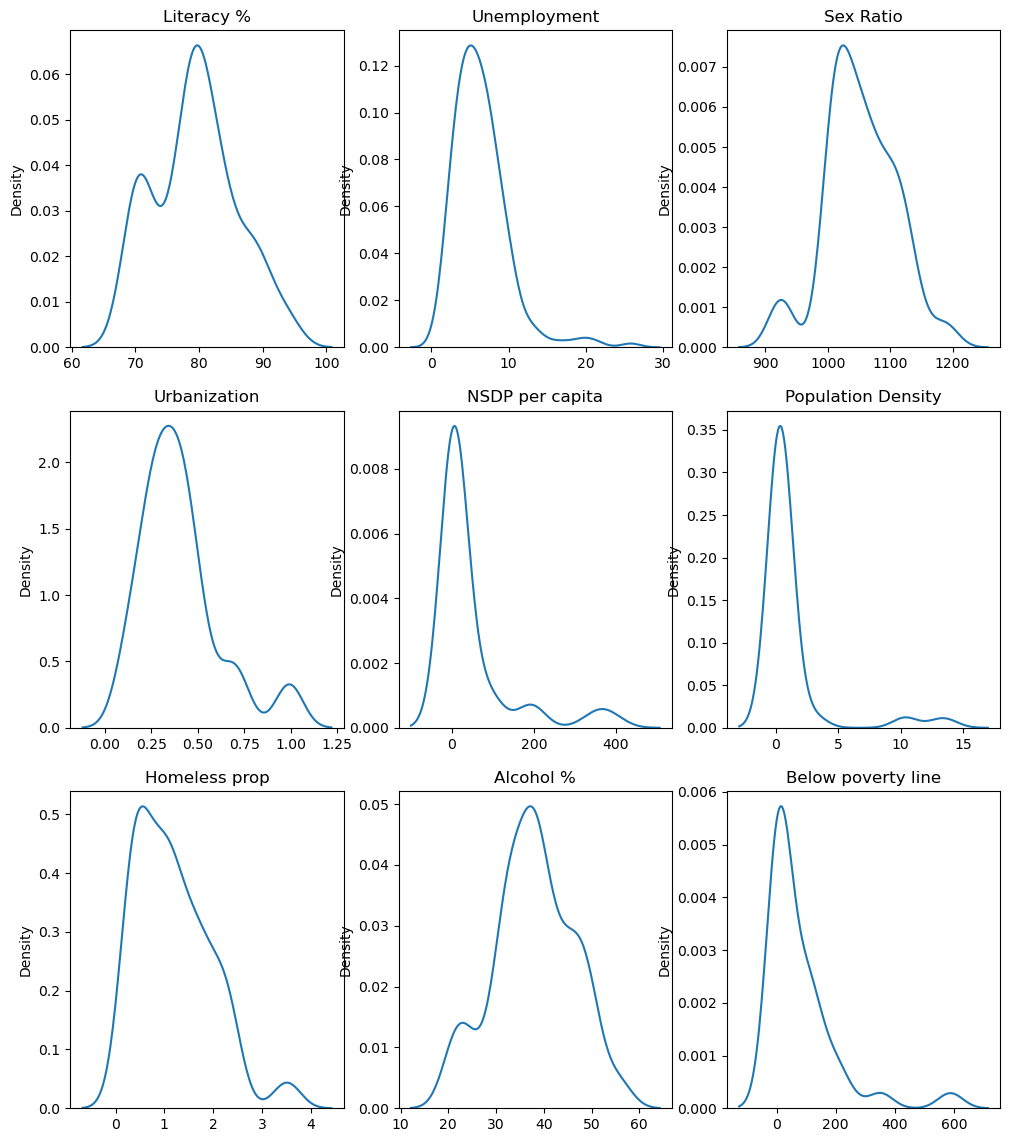

In [41]:
fig, ax = plt.subplots(3,3,figsize=(12,14))
k=0
columns = list(data.drop(['Sl.No.','State/UT','Greed','Loath','Love',
                'Year','Total Murders','Region'],axis=1).columns)

for i in range(3):
    for j in range(3):
        sns.kdeplot(data=data,x=columns[k],ax = ax[i,j]).set(title=columns[k],xlabel=None)
        k += 1

<Axes: >

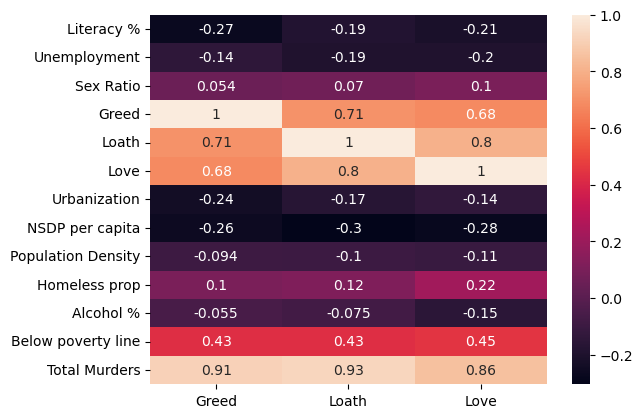

In [42]:
sns.heatmap(data.drop(['Sl.No.','Year'],axis=1).corr()[['Greed','Loath','Love']],annot=True)

<Axes: >

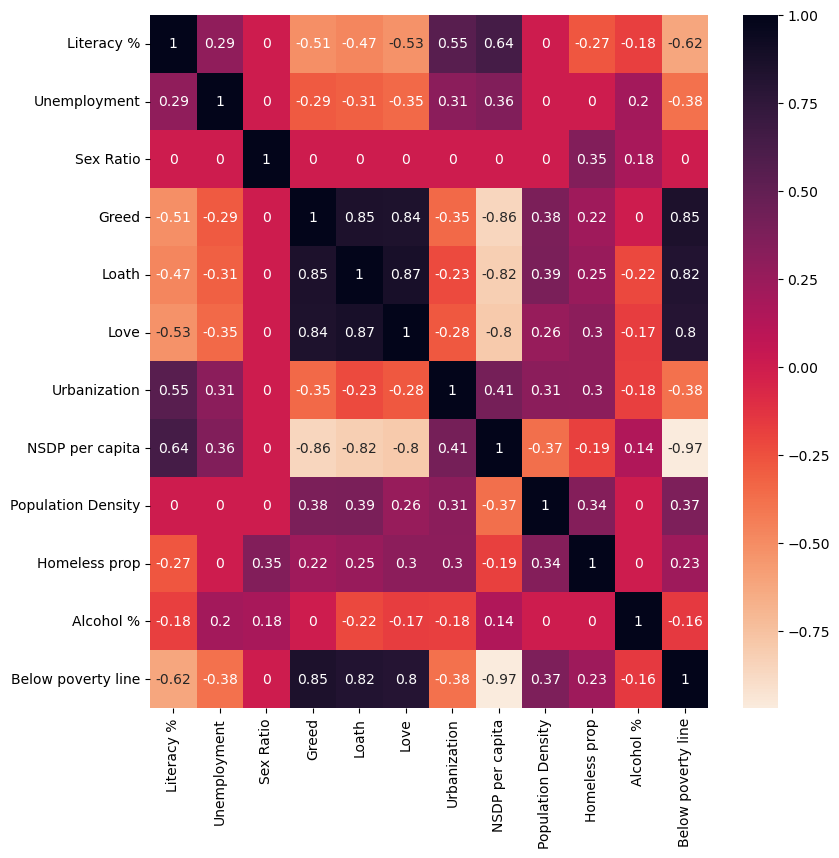

In [43]:
from scipy.stats import spearmanr

columns = list(data.drop(['Sl.No.','State/UT',
                'Year','Total Murders','Region'],axis=1).columns)

p_values = {}
for i in range(len(columns)):
    t = []
    for j in range(len(columns)):
        coef, p = spearmanr(data[columns[i]],data[columns[j]])
        if round(p,3) > 0.05:
            coef = 0
        t.append(round(coef,2))
    p_values[columns[i]] = t
ps = pd.DataFrame(p_values)
ps.index = columns
plt.figure(figsize=(9,9))
sns.heatmap(ps,annot=True,cmap="rocket_r")

<Axes: >

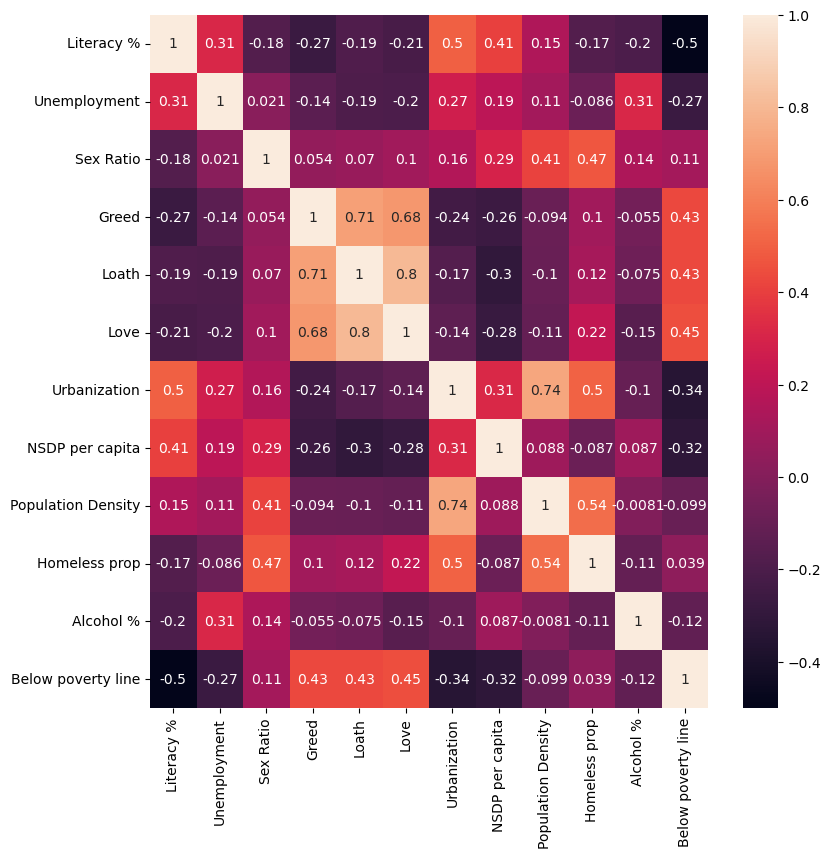

In [44]:
plt.figure(figsize=(9,9))
sns.heatmap(data[columns].corr(),annot=True)

## Relation of motives with various factors

In [59]:
feature_columns = data.drop(['Sl.No.','State/UT',
                'Total Murders','Region','Greed','Love','Loath'],axis=1).columns
motives = ['Greed','Love','Loath']

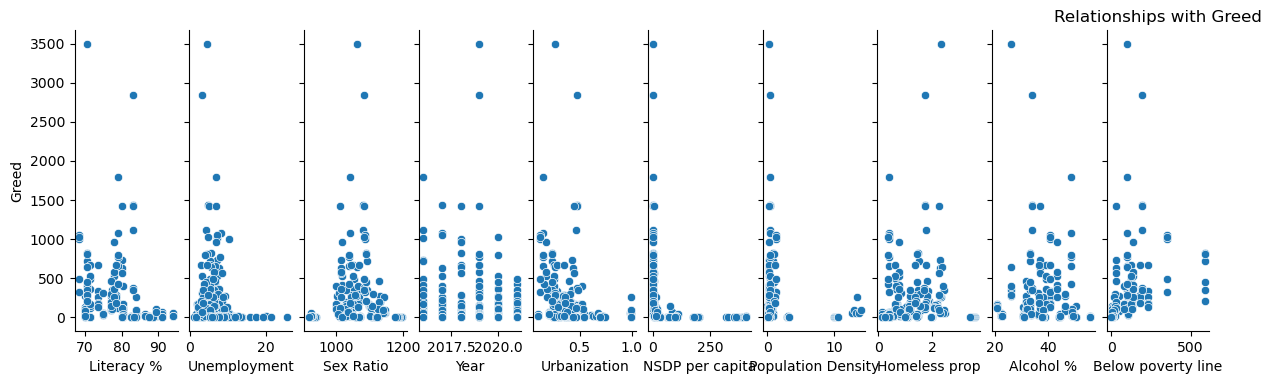

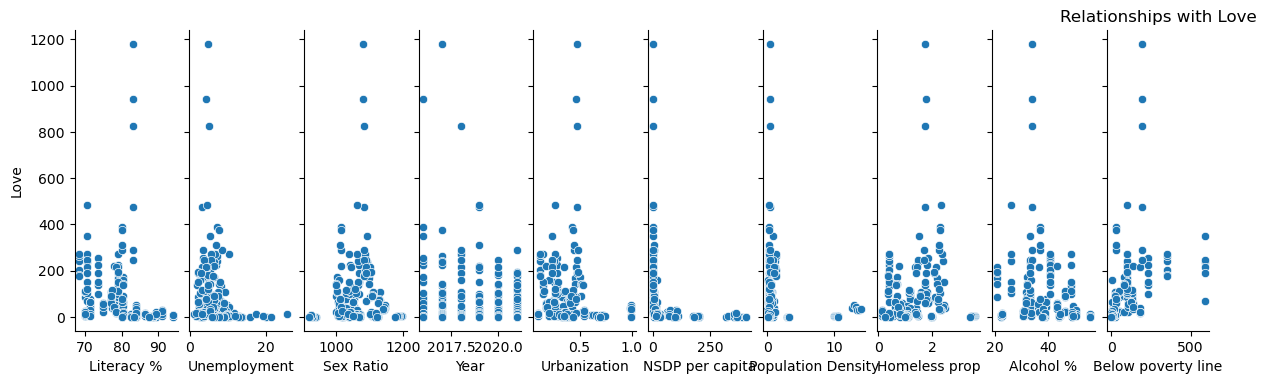

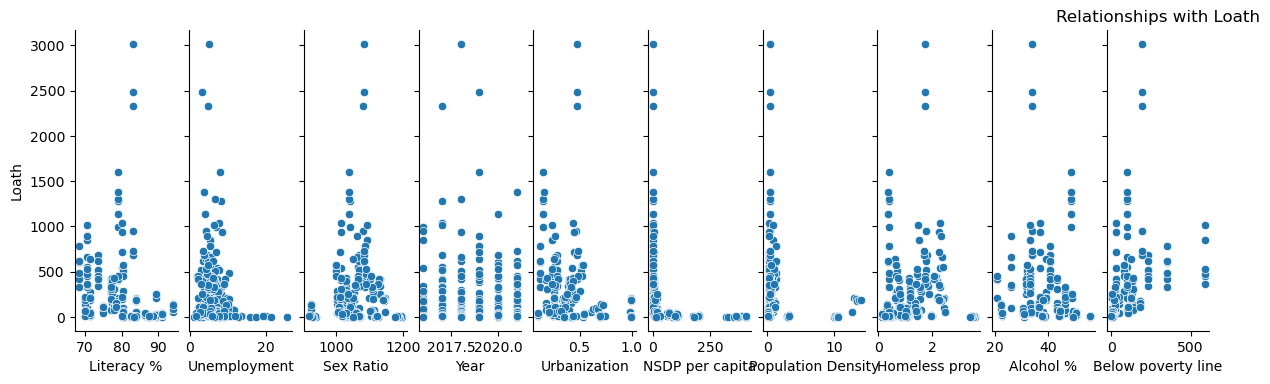

In [60]:
for motive in motives:
    p = sns.pairplot(data, x_vars=feature_columns, y_vars=motive)
    p.fig.set_size_inches(12,4)
    plt.title(f'Relationships with {motive}')
    plt.show()

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X = add_constant(data[feature_columns])
# X = data[feature_columns]

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

               Feature           VIF
0                const  1.524262e+06
1           Literacy %  2.658695e+00
2         Unemployment  1.512818e+00
3            Sex Ratio  2.304563e+00
4                 Year  1.091845e+00
5         Urbanization  6.010552e+00
6      NSDP per capita  1.930773e+00
7   Population Density  3.416560e+00
8        Homeless prop  2.960017e+00
9            Alcohol %  1.427135e+00
10  Below poverty line  1.516056e+00


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Lasso
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [63]:
# def revise(cols):
#     col = []
#     for i in cols:
#         a = i.split()
#         t = '_'.join(a)
#         col.append(t)
#     return col

In [64]:
# data.columns

In [65]:
# m1str = '{} ~ Literacy_% + Unemployment + Sex_Ratio + Urbanization +\
# NSDP_per_capita + Population_Density + Homeless_prop + Alcohol_% + Below_poverty_line'
# m2str = '{} ~ Literacy_% + Unemployment + Sex_Ratio +\
# NSDP_per_capita + Population_Density + Homeless_prop + Alcohol_% + Below_poverty_line'

# d = data
# d.columns = revise(d.columns)

# for motive in motives:
#     m01 = ols(m1str.format(motive),data=d).fit()
#     m02 = ols(m2str.format(motive),data=d).fit()
#     anovaResults = anova_lm(m01, m02)
#     print('For {} :'.format(motive))
#     print(anovaResults)

In [66]:
# Regression analysis for each motive
reg_coeff = {}
for motive in motives:
    X = data[feature_columns]
    y = data[motive]
    
    scaler = StandardScaler() 
    X = scaler.fit_transform(X) 
    
    model = Lasso()
    model.fit(X, y)

    
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    reg_coeff[motive] = [round(c,1)for c in model.coef_]
    print(f'Regression results for {motive}:')
    print(f'Coefficients: {model.coef_}')
    print(f'Intercept: {model.intercept_}')
    print(f'R-squared: {r2}')

Regression results for Greed:
Coefficients: [  45.79585729    0.97572821   -1.72293101  -27.16368471 -106.23186902
  -40.19830154   -0.98266677   96.14178166    6.32228266  154.82809076]
Intercept: 243.84557117405285
R-squared: 0.23545884206956957
Regression results for Love:
Coefficients: [ 24.82771389 -12.78804778  19.46265322 -18.08488726  13.16264687
 -30.09925995 -47.46556646  39.05994143  -0.22880192  60.61699163]
Intercept: 90.63959896083847
R-squared: 0.34398465843293635
Regression results for Loath:
Coefficients: [ 102.90654256  -43.3187714    70.11248801    0.           21.22388808
 -121.82986416  -99.65625893   58.37408856   30.82038392  170.70381392]
Intercept: 278.8739500180125
R-squared: 0.2806295848454322


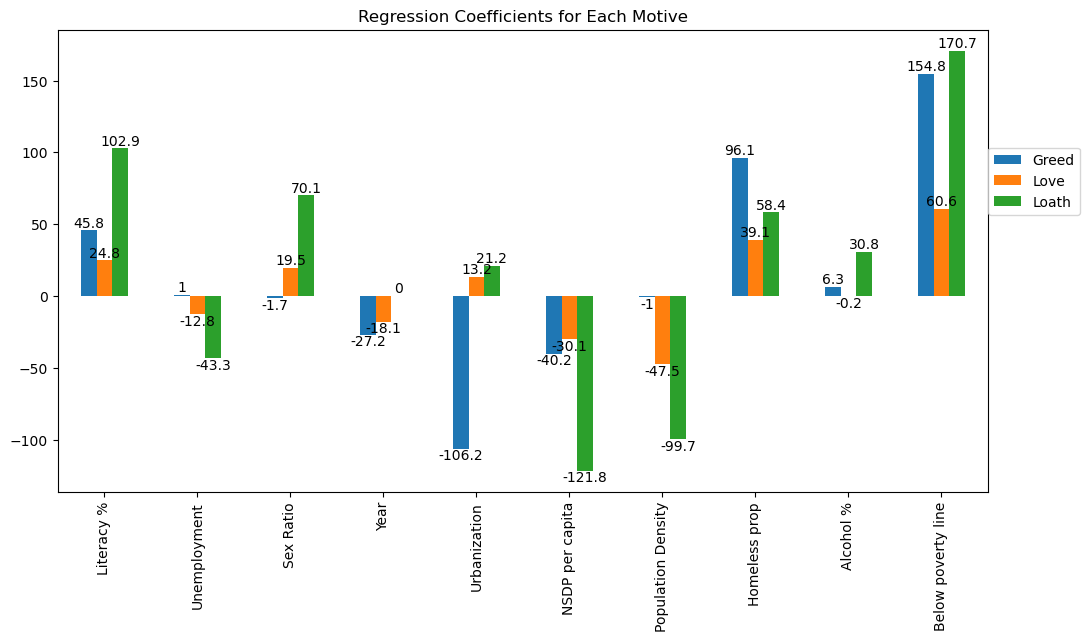

In [67]:
coefficients = pd.DataFrame.from_dict(reg_coeff, orient='index')
coefficients.columns = feature_columns
ax = coefficients.T.plot(kind='bar',figsize=(12, 6),
                       title='Regression Coefficients for Each Motive')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc=(1,0.6))
plt.show()

In [68]:
regions = ['N','S','W','E','NE','C']

In [69]:
reg_coeff = {}
for region in regions:
    d = data[data['Region'] == region]
    X = d[feature_columns]
    y = d['Total Murders']
    
    scaler = StandardScaler() 
    X = scaler.fit_transform(X) 
    
    model = Lasso(alpha=10)
    model.fit(X, y)

    
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    reg_coeff[region] = [round(c,1)for c in model.coef_]

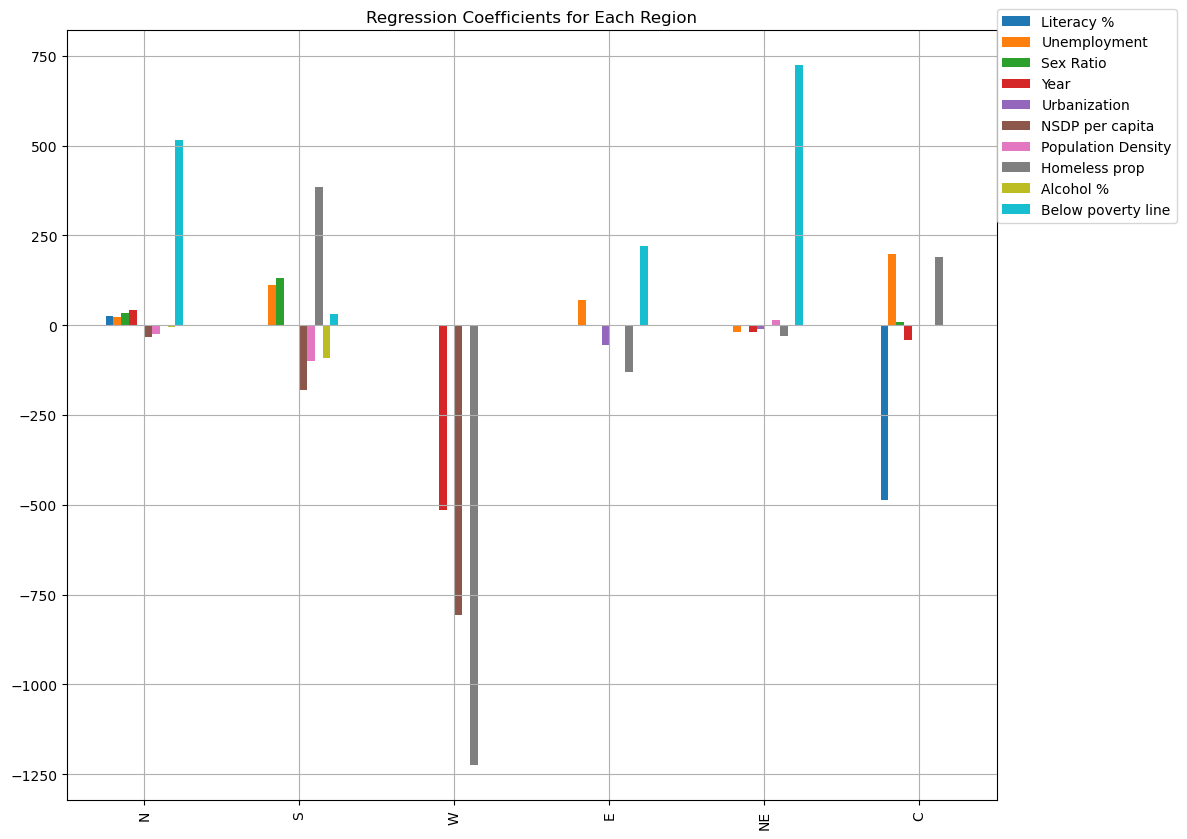

In [70]:
coefficients = pd.DataFrame.from_dict(reg_coeff, orient='index')
coefficients.columns = feature_columns
ax = coefficients.plot(kind='bar',figsize=(12, 10),
                       title='Regression Coefficients for Each Region')
# for container in ax.containers:
#     ax.bar_label(container)
plt.legend(loc=(1,0.75))
plt.grid(True)
plt.show()

<Axes: >

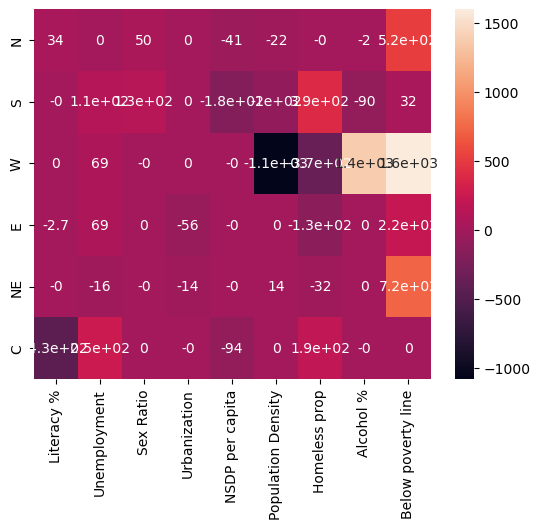

In [57]:
sns.heatmap(coefficients,annot=True)

In [58]:
reg_coeff

{'N': [33.7, 0.0, 50.4, 0.0, -41.2, -21.6, -0.0, -2.0, 518.2],
 'S': [-0.0, 111.9, 131.7, 0.0, -181.3, -100.2, 385.1, -90.0, 32.1],
 'W': [0.0, 68.9, -0.0, 0.0, -0.0, -1081.8, -369.3, 1374.8, 1599.7],
 'E': [-2.7, 68.9, 0.0, -55.8, -0.0, 0.0, -129.8, 0.0, 221.4],
 'NE': [-0.0, -15.5, -0.0, -14.5, -0.0, 13.8, -32.0, 0.0, 721.3],
 'C': [-434.4, 252.5, 0.0, -0.0, -94.0, 0.0, 192.1, -0.0, 0.0]}